#Dalgacık Dönüşümü ile Epileptik Nöbet Tanıma Sistemi

####Nur Altıparmak

Epileptik nöbet, çok sayıda insanın hayatını etkileyen ciddi bir hastalıktır ve beyindeki anormal elektriksel aktiviteden kaynaklanır [1]. Çoğu nöbet çok kısadır ve nadiren hayatı tehdit edecek seviyeye gelir ancak tedavi ve özel bakım için bu tarz kritik nöbetler derhal tanınmalıdır.Ayrıca Epileptik nöbet hastaları için özel tedaviler ve sürekli gözlem de gerekmektedir.Çalışmalara göre [6], erken tanı ile nöbetleri kontrol altına almak mümkündür.Bu yüzden olsa gerek ki geçmişte erken tanı koyabilmek adına epileptik nöbet tanıma sistemleri geliştirilmiştir.Bunlardan biri de EEG sinyalleri ile tanı koymadır ancak EEG sinyalleri epileptik nöbet tanıma için güçlü bir araç olsa dahi, sinyalleri ayırt etmek için görsel inceleme zaman alan ve yüksek maliyetli bir süreçtir [2].Bu nedenle, bu projede makine öğrenimi ve derin öğrenme teknikleri yardımıyla dalgacık dönüşümüne sokulmuş EEG sinyalerinden hızlı ve etkili epileptik nöbet saptaması amaçlanmıştır.

## İçerik

[Problem](#problem)   
[Verinin Anlaşılması](#data_understanding)   
[Verilerin Hazırlanması](#data_preparation)   
[Modelleme](#modeling)   
[Değerlendirme](#evaluation)   
[Referanslar](#references)   


## Problem <a class="anchor" id="problem"></a>

Epilepsi, tekrarlayan epileptik nöbetlerle karakterize bir nörolojik bozukluktur [3].Bu nöbetler şiddetli titreme ataklarına neden olabilir, bu nedenle nöbetler esnasında hastalar kendisine ciddi fiziksel zarar verebilmektedir.Buna rağmen epilepsi tedavi edilebilir bir hastalıktır.Erken tanı ve ilaç tedavisi ile vakaların %70'i tedavi edilebilmektedir[4] [5]. Bu nedenle erken tanı koymak için zaman içinde birçok epilepsi tanı yöntemi geliştirilmiştir. Bunlardan biri de EEG sinyalleri ile tanı koymadır.Ancak EEG'leri ayırt etmek için görsel inceleme süreci zaman alıcı ve yüksek maliyetli bir süreçtir.Bu nedenle bu projede makine öğrenimi ve derin öğrenme teknikleri yardımıyla EEG sinyalerinden hızlı ve etkili epileptik nöbet saptaması amaçlanmıştır.

## Verinin Anlaşılması<a class="anchor" id="data_understanding"></a>

Bu proje için, 5 farklı hedef sınıf, 179 nitelik ve 11500 örnek içeren Bonn Üniversitesi'nin yeniden yapılandırılmış EEG zaman serisi veri kümesini kullanacağım. 2, 3, 4 ve 5 sınıflarında ki denekler epileptik nöbet geçirmezken sınıf 1'deki denekler epileptik nöbet geçiren deneklerdir.

Aşağıda veri seti hakkında daha fazla detay verilmiştir.$$$$

![alt text](https://drive.google.com/uc?id=1N8VQKY9UjAdy0AjhRS7bDts3xcHILZR4)

![alt text](https://drive.google.com/uc?id=1CrfBl5fwNpWIlktNriTPDknezzHkkXTe)

Kullandığım veri setine şu adresten ulaşabilirsiniz
https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition

In [0]:
#datayı import ediyorum
from google.colab import files
uploaded = files.upload() #data.csv dosyasını seçin

Saving data.csv to data.csv


In [0]:
import pandas as pd
import numpy as np
df=pd.read_csv("data.csv")
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [0]:
print("Genel satır ve sütün bilgileri ")
df.info()
print("\nHedef Değişken Sınıf Sayıları\n",df["y"].value_counts())

Genel satır ve sütün bilgileri 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed: 0 to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB

Hedef Değişken Sınıf Sayıları
 5    2300
4    2300
3    2300
2    2300
1    2300
Name: y, dtype: int64


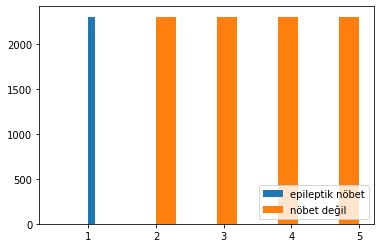

In [0]:
import matplotlib.pyplot as plt
def hist(df,plt):
  plt.hist(df[df["y"]==1]["y"],label="epileptik nöbet")
  plt.hist(df[df["y"]!=1]["y"],label="nöbet değil")
  plt.legend(loc='lower right')
  plt.show()

hist(df,plt)

Tüm sınıflardan eşit miktarda örnek var ve veri dengeli görünüyor ancak bu projede sadece deneğin nöbet geçirip geçirmediği ile ilgileniyoruz.Bu yüzden ilerleyen aşamalarda 1'den farklı sınıfların hepsini 0'a çevirip projeyi binary sınıflandırma(hedef değişkenin 2 farklı sınıftan oluşması) problemine çevirmiş olacağım.Bu durumda da veri seti oldukça dengesiz bir hale gelicek.

## Verilerin Hazırlanması <a class="anchor" id="data_preparation"></a>

Veri hazırlama sürecinde, ilk olarak, gereksiz sütunları temizledim,hedef değişkenini ikili sınıflara (nöbet olması durumu için 1, nöbet olmaması durumu için 0) dönüştürdüm. Daha sonra Hurst üssü ve Ayrık dalgacık dönüşümü adı verilen bazı matematiksel dönüşümlerle yeni değişkenler oluşturdum (merak etmeyin, tüm bu dönüşümlerin detaylarını açıklayacağım.).Daha sonra dengesiz veriyi daha dengeli hale getirebilmek için yeniden yapılandırdım ve veri setini normalize ettim.Son olarak Anova test ve Random forest yardımı ile özellik seçimi yapıp,doğruluk oranlarını iyileştirip iyileştirmediğini inceledim.

######**Veri temizliği ve hedef değişken dönüşümü**

In [0]:
df.head(2) #verimize çabuk bir bakış atalım, x1 ... x178 sütunları, zaman serisi verimizin (EEG Sinyalleri) bir parçasıdır 
#ancak Unnamed: 0 sütununun gereksiz olup olmadığının incelenmesi gerekir.

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1


In [0]:
df["Unnamed: 0"].value_counts #Sizin de gördüğünüz gibi bu sütündaki bütün veriler kendine has değerlere sahip
                              #Bu da demek oluyorki sınıfların birbirinden ayrıştırılmasında bu sütünün herhangi bir etkisi yok
                              #Sütün gereksiz

<bound method IndexOpsMixin.value_counts of 0        X21.V1.791
1        X15.V1.924
2           X8.V1.1
3         X16.V1.60
4         X20.V1.54
            ...    
11495    X22.V1.114
11496    X19.V1.354
11497      X8.V1.28
11498    X10.V1.932
11499    X16.V1.210
Name: Unnamed: 0, Length: 11500, dtype: object>

In [0]:
#Bu method (Unnamed: 0) sütünunu veriden atıcak ve hedef değişkenlerimizi binary hale getirecek
def prepareData(df):
  df["y"]=[1 if df["y"][i]==1 else 0 for i in range(len(df["y"]))]
  target=df["y"]
  df_copy=df.drop(["Unnamed: 0","y"],axis=1)
  return df_copy,target

df_copy,target=prepareData(df)

######**Hurst Üssü değeri ve Ayrık dalgacık dönüşümü ile yeni özellik çıkarımı**

Projeyi kodlamaya başlamadan önce, biraz literatür taraması yaptım ve incelemelerim sonucu ham zaman serisi verilerini kullanmak yerine,
bu verileri dönüşümlere sokup yeni özellikler çıkartmaya karar verdim.Bahsettiğim dönüşümlerin detaylarını aşağıda açıklıyorum.

**Hurst Üssü**

Hurst üssü, zaman serilerinin uzun süreli belleğinin bir ölçüsü olarak kullanılır.Zaman serilerinin otokorelasyonları ve değer çiftleri arasındaki gecikme arttıkça bu oranın azalması ile ilgilidir [7].Hurst üssü özellikle finans trendlerinin tahmininde kullanılmaktadır ve veride ki fraktallara hassastır zaten temel olarak bu değişkeni kullanmamın ana nedeni de,sınıflar arasında belirli dalgalanma farkları/fraktal analiz farkları olabileceğini düşünmem ve bunun hurst üssü yardımıyla bulunabileceğini fikri üstünde durmamdan kaynaklıdır.

Hurst Üssü formülü:

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/d32a26032869f8c902eb7a3062309dd88de63b5b)$$$$

**Ayrık Dalgacık Dönüşümü:**

Ayrık Dalgacık Dönüşümü (DWT), dalgacıkların ayrı ayrı örneklendiği herhangi bir dalgacık dönüşümünün bir türüdür [8]. (Pek de açıklayıcı bir tanım olduğu söylenemez değil mi? Ama merak etmeyin dalgacık dönüşümleri hakkında biraz daha fazla detay vermeye çalışacağım :D).

**Not:** Projede literatürde de oldukça yaygın olan db4 tipi DWT kullandım ve ayrıca literatürde hangi türlerin sıklıkla kullanıldığını gösteren aşağıda ki tabloya da bakabilirsiniz.
$$$$

![alt text](https://drive.google.com/uc?id=1Mgf76Fem5ts2Tntx4GL-oYGVxc-HQBFy)

(Bu tablo [13] referansda ki tezden alınmıştır.Daha fazla detay için referansa göz atabilirsiniz)
$$$$

**Dalgacık dönüşümü :**

Eğer Fourier Dönüşümü'nü zaten biliyorsanız, Wavelet dönüşümü daha somut olarak açıklanabilir.Fourier Dönüşümü'nde, dönüşüm herhangi bir zaman bilgisi(zaman alanı) olmadan sinyalde hangi frekansların (frekans alanı) var olduğunu anlayabilir, Dalgacık dönüşümü ise hem zaman alanı hem de frekans alanı hakkında bilgi verebilir.Dalgacık dönüşümü, küçük frekanslarda frekans alanı hakkında daha fazla bilgi verirken, diğer yandan büyük frekans değerlerinde zaman alanı hakkında daha fazla bilgi verir [9].

![alt text](https://drive.google.com/uc?id=1dUhbFebAHnD7h_Yq5GvyKGXKinrzPFXo)

(Resim, [10]da ki referansdan alınmış ve değiştirilmiştir.)

(Dalgacık dönüşümü hakkında daha fazla detay için lütfen [9]da ki linke göz atın.Başlangıç seviyesi için oldukça güzel bir kaynak.)





In [0]:
pip install hurst # hurst modulünü indirme

In [0]:
import pywt #dalgacık dönüşümü için pywt kütüphanesini import edin
from hurst import compute_Hc

In [0]:
#Bu method hurst değerini ve sabitini hesaplamaktadır
def getHurst(df_copy):
  df_copy["hurst_ex"]=[compute_Hc(df_copy.iloc[i], kind="change", simplified=True)[0] for i in range(len(df_copy))]
  df_copy["hurst_c"]=[compute_Hc(df_copy.iloc[i], kind="change", simplified=True)[1] for i in range(len(df_copy))]
  return df_copy

#Bu methodda sınıflara göre hurst üssü ve sabitinin medyan ve ortalama değerlerine bakıyorum
def getStatsForHurst(df_copy):
  plt.scatter(df_copy["hurst_ex"],target)
  print("mean value of hurst exponent for class 1:",np.mean(df_copy.iloc[target[target==1].index]["hurst_ex"]))
  print("mean value of hurst exponent for class 0:",np.mean(df_copy.iloc[target[target==0].index]["hurst_ex"]))
  print("mean value of hurst constant for class 1:",np.mean(df_copy.iloc[target[target==1].index]["hurst_c"]))
  print("mean value of hurst constant for class 0:",np.mean(df_copy.iloc[target[target==0].index]["hurst_c"]))
  print("median value of hurst exponent for class 1:",np.median(df_copy.iloc[target[target==1].index]["hurst_ex"]))
  print("median value of hurst exponent for class 0:",np.median(df_copy.iloc[target[target==0].index]["hurst_ex"]))
  print("median value of hurst constant for class 1:",np.median(df_copy.iloc[target[target==1].index]["hurst_c"]))
  print("median value of hurst constant for class 0:",np.median(df_copy.iloc[target[target==0].index]["hurst_c"]))

In [0]:
#Aşağıdaki methodlarla yeni featurelardan oluşan bir veri seti yaratıyorum.
#getWaveletFeatures methodunda datasette ki bütün örnekler için dalgacık katsayılarını alıyorum
#katsayıları statisticsForWavelet methoduna verip katsayıların çeyrek değerleri,ortalmaları,medyanları,standart sapma değerlerini,varyanslarını,root mean square değerlerini ve birkaç başka değerini hesaplatıyorum.
#Son olarak createDfWavelet methodu ile bu yeni sütünlardan yeni bir veriseti oluşturuyorum.
def getWaveletFeatures(data,target):
    list_features = []
    for signal in range(len(data)):
        list_coeff = pywt.wavedec(data.iloc[signal], "db4")
        features = []
        features.append(data.iloc[signal]["hurst_ex"])
        features.append(data.iloc[signal]["hurst_c"])
        for coeff in list_coeff:
            features += statisticsForWavelet(coeff)
        list_features.append(features)
    return createDfWavelet(list_features,target)
#Bu method referans [9]dan alınmıştır
def statisticsForWavelet(coefs):
    n5 = np.nanpercentile(coefs, 5)
    n25 = np.nanpercentile(coefs, 25)
    n75 = np.nanpercentile(coefs, 75)
    n95 = np.nanpercentile(coefs, 95)
    median = np.nanpercentile(coefs, 50)
    mean = np.nanmean(coefs)
    std = np.nanstd(coefs)
    var = np.nanvar(coefs)
    rms = np.nanmean(np.sqrt(coefs**2))
    return [n5, n25, n75, n95, median, mean, std, var, rms]

def createDfWavelet(data,target):
  for i in range(len(data)):
    data[i].append(target[i])
  return pd.DataFrame(data)       

mean value of hurst exponent for class 1: 0.17426759520249896
mean value of hurst exponent for class 0: 0.5044276844723695
mean value of hurst constant for class 1: 22.537759589041105
mean value of hurst constant for class 0: 9.76579181307516
median value of hurst exponent for class 1: 0.16788038442091022
median value of hurst exponent for class 0: 0.5082046350724865
median value of hurst constant for class 1: 10.294529749768916
median value of hurst constant for class 0: 5.251374799982095


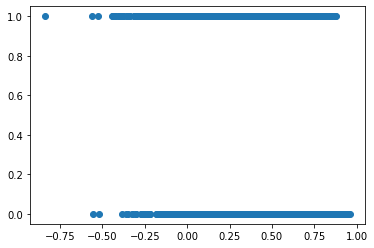

In [0]:
df_copy=getHurst(df_copy) #hurst üssü değerlerini hesaplatıyorum
getStatsForHurst(df_copy)

In [0]:
df_copy_fea=getWaveletFeatures(df_copy,target)#yeni data setimiz

In [0]:
df_copy_fea.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,0.546585,2.601079,-305.176164,-151.216527,723.449162,776.917001,-3.295061,185.214508,421.056252,1.772884e+05,362.384596,-118.255497,-14.756858,112.742925,181.068760,38.918875,43.017619,96.291006,9271.957908,82.299186,-282.140173,-93.356560,83.190719,241.024738,-19.130124,-15.012851,159.427454,25417.113146,127.616292,-84.288361,-27.085687,25.839238,64.083271,-5.246926,-2.354776,46.331585,2146.615760,36.145883,-14.957938,-5.592195,5.819614,13.353548,0.068490,-0.211866,9.135993,83.466361,7.263468,0
1,-0.254452,75.697950,-1242.993850,-488.612159,1410.559480,1774.820173,603.491844,509.288143,1217.249973,1.481697e+06,1139.870482,-1513.818103,-506.059703,178.143757,1402.623818,-40.415845,-140.425072,816.324380,666385.493673,567.598282,-723.611943,-180.580005,125.722567,867.058241,-18.439261,-27.032981,483.947890,234205.560224,313.691461,-230.912721,-40.390111,40.967077,203.621093,0.179625,-1.976516,213.647453,45645.234141,105.978403,-24.898853,-6.318527,4.878626,33.563928,-0.514451,-0.682946,30.317390,919.144152,14.445416,1
2,0.742152,3.615098,-309.103358,-210.090841,-117.128242,-3.579475,-153.466544,-160.911085,93.143353,8.675684e+03,160.911085,-194.163602,-44.434483,2.659560,35.806625,-11.508281,-31.405705,67.695044,4582.618989,44.044606,-110.870327,-48.401351,48.215553,90.924135,5.788707,-0.261057,66.397043,4408.567255,53.872532,-26.976553,-17.167687,16.434903,29.220142,2.497897,0.764631,19.968472,398.739870,17.381640,-7.360370,-3.528846,3.431295,6.996356,-0.295030,-0.251944,4.958808,24.589778,3.869186,0
3,0.767329,12.232493,-392.667105,-384.158663,-274.167936,-168.574097,-295.871642,-294.446636,96.600146,9.331588e+03,295.594845,-50.378062,-6.343640,22.221957,56.380391,8.802419,8.508557,33.808497,1143.014456,26.964985,-49.878219,-17.150750,19.639245,34.120662,7.996985,2.005385,26.269508,690.087074,21.719040,-13.314688,-5.828000,5.282980,14.428778,-0.699589,-0.378611,11.801291,139.270476,8.033911,-5.068773,-2.264661,2.383344,5.377493,0.336105,0.040430,5.218204,27.229656,3.162152,0
4,0.647870,2.538971,-276.585954,-255.283369,5.788142,87.801277,-79.855665,-100.024326,137.229131,1.883183e+04,137.196686,-118.472221,-50.295091,15.728461,61.397235,-13.467008,-16.719396,59.952932,3594.354091,49.218659,-91.214554,-51.554051,31.027079,83.607092,2.235106,-5.263506,53.373437,2848.723725,44.339743,-47.796112,-13.439282,21.991572,49.627529,0.224143,1.325679,29.940156,896.412956,22.968023,-9.831802,-3.274258,3.681270,9.592965,-0.133232,0.179974,7.101117,50.425867,4.900663,0


**Veri setini yeniden örnekleme**

Yeniden örnekleme yapmadan önce, 0 sınıfı veri setinin büyük çoğunluğunu kaplıyordu ve veriyi dengesiz hale getiriyordu.Makine öğrenimi/derin öğrenme modelleri için daha dengeli bir veri kümesi elde etmek adına.Veriyi karıştırıp yeniden örnekleyerek veri setini dengelemeye çalıştım.

In [0]:
from sklearn.utils import shuffle
def createBalancedDataset(data,random_state):
  #Veriyi karıştırıyoruz
  X = shuffle(data,random_state=random_state)
  #karışmış veriyi azalan şeklinde sıralayıp ilk 6500 örneğin indexlerini alıyoruz
  #Böylece 2300 tane olan 1 sınıfının hepsini ve 4200 tane de 0 sınıfını almış oluyoruz
  #Verinin bu hali önceki halinden daha dengeli durumda
  return X.sort_values(by=47, ascending=False).iloc[:6500].index

0    4200
1    2300
Name: 47, dtype: int64

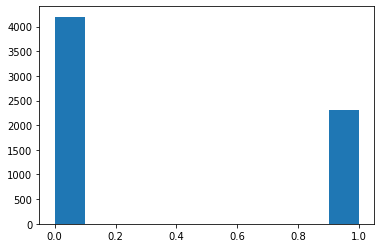

In [0]:
v=createBalancedDataset(df_copy_fea,42)
plt.hist((df_copy_fea.iloc[v])[47])
(df_copy_fea.iloc[v][47]).value_counts() #more balanced dataset

**Veriyi normalize etme**

Özellik seçiminden önce verileri normalleştirdim çünkü Anova testi için normalleştirme gereklidir.Ayrıca normalleştirme birçok makine öğrenme algoritması için de bir ön koşuldur [11].

In [0]:
#Min-max scaler ile normalizasyon
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_copy_fea.drop([47],axis=1))
n_df_fea=pd.DataFrame(scaler.transform(df_copy_fea.drop([47],axis=1)))

**Anova ve Random Forest ile özellik seçimi**

Modellere girdi vermeden önce özellik seçiminin modellerin doğruluk oranlarını iyileştirip iyileştirmediğini kontrol ettim.Bu durumu anlamak için önce tüm özellikleri modele verdim ve sonra sadece modele girdi olarak seçilen özellikleri verdim ve modellerin doğruluk oranlarını ve f-skorlarını karşılaştırdım .

Özellik seçimi için, aşağıdaki diyagramdan yardım aldım.Veri kümesinin girdi değerleri sayısal, hedef değişkeni kategorik olduğundan, özellik seçimi için Anova testi tercih ettim.Ayrıca bunları karşılaştırmak için Random-Forest algoritması ile bir özellik seçimi daha yaptım.Özellik seçimleri, çoğu durumda doğrulukların iyileştirilmesinde rol oynasa da, Bu durumda, herhangi bir iyileştirme yapamadı bu yüzden girdi olarak tüm özelliklerle devam etmeye karar verdim.


![alt text](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png)

(Resim [12]den alınmıştır)

Gözlem yapmak için SVM modeli kullanıcam.Bu modele sırasıyla bütün sütünları içeren girdiyi, Anova'nın seçtiği sütünları ve Random-Forest'in seçtiği sütünları girdi olarak verip doğruluk değerlerini karşılaştıracağım.

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
X_trainr, X_testr, y_trainr, y_testr = train_test_split(n_df_fea.iloc[v], target.iloc[v], test_size=0.33, random_state=42) #veriyi train ve test olarak ayırıyorum.

In [0]:
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

#Neden SVM seçtiğim ve bu parametreleri kullandığımı model bölümünde detaylandıracağım.
clf = svm.SVC(kernel="linear")
clf.fit(X_trainr, y_trainr)
#Doğruluk değerlerinin daha sağlıklı olması adına cross validation kullanacağım
y_pred = cross_val_predict(clf,X_testr,y_testr,cv=10)
print("Bütün özelliklerin dahil olduğu model\n",classification_report(y_testr, y_pred))

Bütün özelliklerin dahil olduğu model
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1373
           1       0.98      0.93      0.95       772

    accuracy                           0.97      2145
   macro avg       0.97      0.96      0.96      2145
weighted avg       0.97      0.97      0.97      2145



**Anova ile en önemli 20 özelliğin seçimi**

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
#bu method anova testi yapıp en önemli 20 özelliği seçtikten sonra
#sadece bu 20 özelliği içeren yeni bir dataset yaratıyor
def selectFeature(X_trainr,y_trainr,X_testr):
  sel_f = SelectKBest(f_classif, k=20)
  X_train_f = sel_f.fit_transform(X_trainr, y_trainr)
  mySelectedFeatures=[i for i in range(len(sel_f.get_support())) if sel_f.get_support()[i]==True]
  j=0
  unseable_columns=[]
  #Creating a new dataset with these 20 features
  for i in X_trainr.columns:
    if(j not in mySelectedFeatures):
      unseable_columns.append(i)
    j+=1 
  X_train_arranged=X_trainr.drop(columns=unseable_columns)
  X_test_arranged=X_testr.drop(columns=unseable_columns)
  return  X_train_arranged,X_test_arranged

X_train_arranged,X_test_arranged=selectFeature(X_trainr,y_trainr,X_testr)  

In [0]:
X_train_arranged.columns #Anova testinde çıkan en önemli 20 özellik

Int64Index([2, 5, 8, 10, 11, 14, 17, 19, 20, 21, 22, 23, 26, 28, 29, 32, 35,
            37, 44, 46],
           dtype='int64')

In [0]:
#Doğruluk düştü
from sklearn import svm
from sklearn.metrics import classification_report
clf = svm.SVC(kernel="linear")
clf.fit(X_train_arranged, y_trainr)
y_pred = cross_val_predict(clf,X_test_arranged,y_testr,cv=10)
print("Anova'nın seçtiği özelliklerle oluşturulan model\n",classification_report(y_testr, y_pred))

Anova'nın seçtiği özelliklerle oluşturulan model
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1373
           1       0.97      0.92      0.95       772

    accuracy                           0.96      2145
   macro avg       0.96      0.95      0.96      2145
weighted avg       0.96      0.96      0.96      2145



**Random-Forest ile en önemli 20 özellik seçimi**

In [0]:
#Özellikleri seçmeden önce en iyi parametreleri alabilmek için grid search uyguluyorum
np.random.seed(42)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'max_depth': [2,5],
    'min_samples_split':[2,5,10],
    'n_estimators': [100,150],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
CV_rfc.fit(X_trainr, y_trainr)
print (CV_rfc.best_params_)

{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 150}


In [0]:
#Özellik seçimi için en iyi parametrelerle modeli kuruyorum
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42,max_depth=5,max_features='sqrt',min_samples_split=2,n_estimators=150)
clf.fit(X_trainr, y_trainr)
#modeli kurduktan sonra özelliklerin importance ratelerinden yeni bir dataframe oluşturuyorum
zipped=pd.DataFrame(zip(X_trainr.columns,clf.feature_importances_),columns=["column","importance"]).sort_values(by="importance", ascending=False)
y_pred2 = cross_val_predict(clf,X_testr,y_testr,cv=10)
print("Sınıflandırma raporu\n",classification_report(y_testr, y_pred2))

Sınıflandırma raporu
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1373
           1       0.96      0.96      0.96       772

    accuracy                           0.97      2145
   macro avg       0.97      0.97      0.97      2145
weighted avg       0.97      0.97      0.97      2145



In [0]:
zipped.head(20) #Random-forestin seçtiği en önemli 20 özellik

,column,importance
18,18,0.122870
17,17,0.102400
8,8,0.086825
9,9,0.083827
19,19,0.082742
36,36,0.075209
35,35,0.065976
14,14,0.047009
11,11,0.045067
26,26,0.036911


In [0]:
#F-score ve accuracy düştü
clf = svm.SVC(kernel="linear")
clf.fit(X_trainr[zipped.iloc[:20].index], y_trainr)
y_pred = cross_val_predict(clf,X_testr[zipped.iloc[:20].index],y_testr,cv=10)
print("Only random forest's features are inclueded\n",classification_report(y_testr, y_pred))

Only random forest's features are inclueded
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1373
           1       0.96      0.92      0.94       772

    accuracy                           0.96      2145
   macro avg       0.96      0.95      0.96      2145
weighted avg       0.96      0.96      0.96      2145



![alt text](https://drive.google.com/uc?id=1VwWDqamqvC8_W0CHLsWfKYLmhJVmPmKM)

Sizin de gördüğünüz gibi özellik seçimi doğruluk oranlarını yükseltmiyor aksine düşürüyor bu yüzden modellerimi özellik seçimi yapmadan kuracağım.

## Modelleme <a class="anchor" id="modeling"></a>

Model seçim sürecinde, literatürde en çok kullanılan algoritmaları analiz etmeye çalıştım ve en çok kullanılan algoritmaların ANN'ler / RNN'ler, SVM ve Karar Ağaçları olduğunu gördüm.Kendi modellerim için ise şu 3 modelde karar kıldım SVM (projede binary sınıflandırma problemi çözmeye çalıştığım için [14]),Random Forest (karar ağaçları literatürde oldukça yaygın olarak kullanıldığı ve iyi sonuçlar alındığı için) ve LSTM (RNN modelleri literatürde oldukça yaygın olarak kullanılmış ve iyi sonuçlar alınmış olduğu için ayrıca LSTM benim favori algoritmalarımdan biri :D bu yüzden onu kullanacağım.)

In [0]:
#SVM, kernel hyperparametresi için birkaç farklı çesit kernel denedim ve en yüksek doğruluk oranını veren linearde karar kıldım.
#İlerde Roc curve'ü inceleyebilmek için probabilityi true ya çevirdim
clf = svm.SVC(kernel="linear",probability=True)
clf.fit(X_trainr, y_trainr)
y_pred = cross_val_predict(clf,X_testr,y_testr,cv=10)
print("All features are included\n",classification_report(y_testr, y_pred))

All features are included
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1373
           1       0.98      0.93      0.95       772

    accuracy                           0.97      2145
   macro avg       0.97      0.96      0.96      2145
weighted avg       0.97      0.97      0.97      2145



In [0]:
#Random forest, hyperparametreleri yukardaki grid searchden edindim
clf1 = RandomForestClassifier(random_state=42,max_depth=5,max_features='auto',min_samples_split=5,n_estimators=150)
clf1.fit(X_trainr, y_trainr)
y_pred2 = cross_val_predict(clf1,X_testr,y_testr,cv=10)
print("All featuares are included\n",classification_report(y_testr, y_pred2))

All featuares are included
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1373
           1       0.96      0.96      0.96       772

    accuracy                           0.97      2145
   macro avg       0.97      0.97      0.97      2145
weighted avg       0.97      0.97      0.97      2145



Using TensorFlow backend.


Train on 4355 samples, validate on 2145 samples
Epoch 1/50
 - 3s - loss: 0.6462 - accuracy: 0.6512 - val_loss: 0.8925 - val_accuracy: 0.6401
Epoch 2/50
 - 2s - loss: 0.5971 - accuracy: 0.7031 - val_loss: 0.6156 - val_accuracy: 0.6606
Epoch 3/50
 - 2s - loss: 0.5600 - accuracy: 0.7559 - val_loss: 0.5417 - val_accuracy: 0.7198
Epoch 4/50
 - 2s - loss: 0.5414 - accuracy: 0.7449 - val_loss: 0.6531 - val_accuracy: 0.6802
Epoch 5/50
 - 2s - loss: 0.5131 - accuracy: 0.7819 - val_loss: 0.5946 - val_accuracy: 0.6867
Epoch 6/50
 - 2s - loss: 0.4714 - accuracy: 0.8142 - val_loss: 0.5988 - val_accuracy: 0.7063
Epoch 7/50
 - 2s - loss: 0.4754 - accuracy: 0.7876 - val_loss: 0.4784 - val_accuracy: 0.7748
Epoch 8/50
 - 2s - loss: 0.4432 - accuracy: 0.8197 - val_loss: 0.4054 - val_accuracy: 0.8168
Epoch 9/50
 - 2s - loss: 0.4356 - accuracy: 0.8211 - val_loss: 0.4792 - val_accuracy: 0.7925
Epoch 10/50
 - 2s - loss: 0.3939 - accuracy: 0.8524 - val_loss: 0.3657 - val_accuracy: 0.8429
Epoch 11/50
 - 2s - l

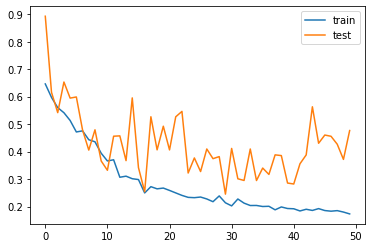

In [0]:
#LSTM
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
# Networkü tasarlarken heuristic bir yaklaşım sergiledim.
X_trainrr=np.array(X_trainr).reshape(X_trainr.shape[0],X_trainr.shape[1],1)
X_testrr=np.array(X_testr).reshape(X_testr.shape[0],X_testr.shape[1],1)
model = Sequential()
model.add(LSTM(50, input_shape=(X_trainrr.shape[1], X_trainrr.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
# fit network
history = model.fit(X_trainrr, y_trainr, epochs=50, batch_size=72, validation_data=(X_testrr, y_testr), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Değerlendirme <a class="anchor" id="evaluation"></a>

Modeli değerlendirmek için modellerin f-skorları, ROC eğrilerini ve genel doğruluk oranlarını (Accuracy) kullandım. Aşağıdaki tablodaki model doğruluklarını ve f-skorlarını görebilirsiniz.

![alt text](https://drive.google.com/uc?id=1Z53mCM5oPJ-yFUI6T1g647KUPrfCTozf)

Gördüğünüz gibi en başarılı algoritma Random Forest ve tüm algoritmalar 0 sınıfını tahmin etmede 1 sınıfını tahmin etmeden daha başarılı.

**ROC Eğrileri**

In [0]:
pip install scikit-plot

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


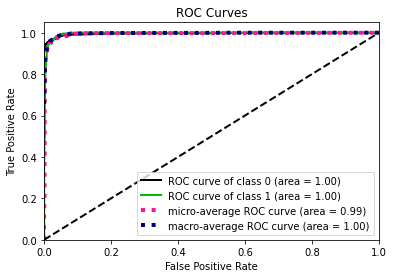

In [0]:
import scikitplot as skplt
import matplotlib.pyplot as plt
#SVM için Roc eğrisi
y_pred_proba=clf.predict_proba(X_testr)
skplt.metrics.plot_roc_curve(y_testr,y_pred_proba)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


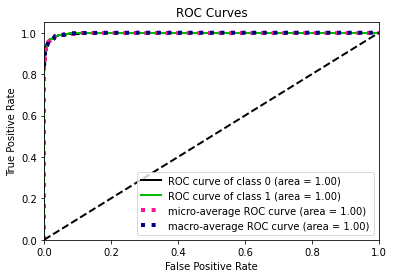

In [0]:
#Random-Forest için ROC eğrisi
y_pred_proba=clf1.predict_proba(X_testr)
skplt.metrics.plot_roc_curve(y_testr,y_pred_proba)
plt.show()

Sizin de gördüğünüz gibi bütün modellerin ROC eğrisi altında kalan alanları, f-scoreları ve genel doğruluk oranları 1 ve %100'e çok yakın. Bu da modellerin sınıflandırma yapmada başarılı olduğunu işaret ediyor.

## Referanslar<a class="anchor" id="references"></a>

[1] S. A. Hosseini, M-R. Akbarzadeh-T,M-B. Naghibi-Sistani, «Qualitative and Quantitative Evaluation of EEG,» MECS, 2013.

[2] Ling Guo, Daniel Rivero, Julián Dorado, Juan R. Rabunal, Alejandro Pazos, «Automatic epileptic seizure detection in EEGs based on line length feature and,» Journal of Neuroscience Methods, 2010.

[3]Chang BS, Lowenstein DH. Epilepsy. N Engl J Med. 2003;349(13):1257‐1266. doi:10.1056/NEJMra022308

[4]Eadie MJ. Shortcomings in the current treatment of epilepsy. Expert Rev Neurother. 2012;12(12):1419‐1427. doi:10.1586/ern.12.129

[5]D. D. A. ÖZKARDEŞ. [Online]. Available: https://www.memorial.com.tr/saglik-rehberleri/epilepsi-ile-ilgili-bilmeniz-gereken-10-gercek/.

[6]Yuan, Q., Li, F., & Zhong, H. (2015). Early diagnosis, treatment and prognosis of epilepsy with continuous spikes and waves during slow sleep. International journal of clinical and experimental medicine, 8(3), 4052–4058.

[7]«Hurst Exponent,» [Online]. Available: https://en.wikipedia.org/wiki/Hurst_exponent.

[8]«Discrete Wavelet Transform,» [Online]. Available: https://en.wikipedia.org/wiki/Discrete_wavelet_transform.

[9]A. Taşpınar, «A guide for using the Wavelet Transform in Machine Learning,» [Online]. Available: http://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/.

[10][Online]. Available: http://ataspinar.com/wp-content/uploads/2018/08/Comparisonoftransformations.jpg.

[11]A. Chavakula. [Online]. Available: https://www.quora.com/Which-machine-algorithms-require-data-scaling-normalization.

[12]J. Brownlee, «Machine Learning Mastery,» [Online]. Available: https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png.

[13]Faust, O., Acharya, U. R., Adeli, H., & Adeli, A. (2015). Wavelet-based EEG processing for computer-aided seizure detection and epilepsy diagnosis. Seizure, 26, 56-64.

[14][Online].Available: https://www.researchgate.net/post/Why_SVM_classifier_is_the_most_powerful_classification_algorithm_specifically_for_binary_classification_task.


**Disclaimer!** <font color='grey'>This notebook was prepared by Nur Altıparmak as a term project for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>